In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# data cleaning 

In [2]:
#detect thye eyes and the faces and crop the imagame andf stroe it in diffferner tfolfder

In [3]:
img = cv2.imread('C:/Users/ANIKET/OneDrive/Desktop/celebrity/sharapova.jpg')

In [4]:
img.shape

(565, 848, 3)

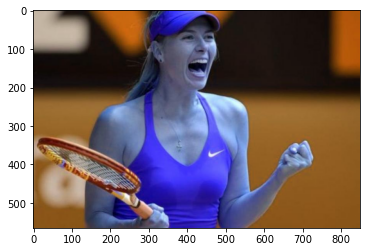

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(565, 848)

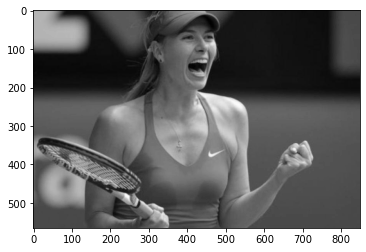

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
# Using haar cascade to detect eyes and face
face_cascade = cv2.CascadeClassifier('C:/Users/ANIKET/OneDrive/Desktop/celebrity/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/ANIKET/OneDrive/Desktop/celebrity/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[389,  34,  98,  98]])

In [9]:
# Marking detected Face
(x,y,w,h) = faces[0]
x,y,w,h

(389, 34, 98, 98)

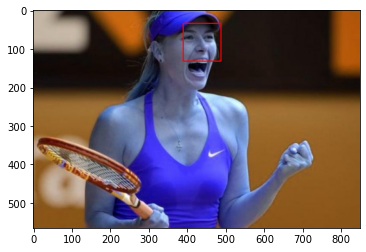

In [10]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

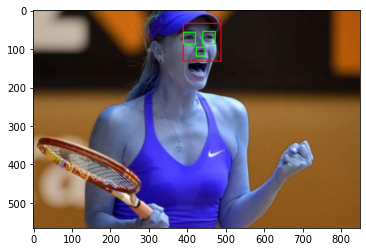

In [11]:
# Marking eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

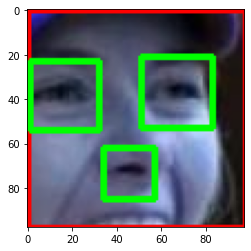

In [12]:
# Cropped Face
plt.imshow(roi_color, cmap='gray')

In [13]:
# Function returns cropped image if 2 eyes are detected
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color
    return None


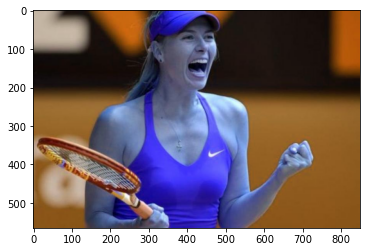

In [14]:
original_image = cv2.imread('C:/Users/ANIKET/OneDrive/Desktop/celebrity/sharapova.jpg')
plt.imshow(original_image)

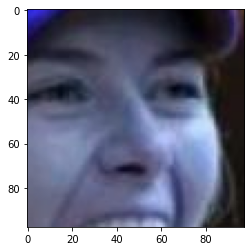

In [15]:
cropped_image = get_cropped_image('C:/Users/ANIKET/OneDrive/Desktop/celebrity/sharapova.jpg')
plt.imshow(cropped_image)

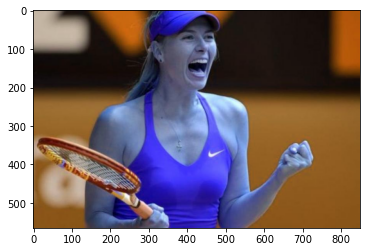

In [16]:
# Function returns None if 2 eyes are not detected
og_image = cv2.imread('C:/Users/ANIKET/OneDrive/Desktop/celebrity/sharapova.jpg')
plt.imshow(og_image)

In [17]:
cropped_img = get_cropped_image('C:/Users/ANIKET/OneDrive/Desktop/celebrity/sharapova.jpg')
cropped_img

array([[[ 43,  39, 222],
        [ 44,  39, 224],
        [ 46,  39, 226],
        ...,
        [ 72,  46,  59],
        [ 80,  53,  49],
        [ 77,  50,  30]],

       [[ 44,  41, 217],
        [ 46,  43, 219],
        [ 50,  44, 221],
        ...,
        [ 75,  50,  64],
        [ 80,  55,  53],
        [ 75,  49,  33]],

       [[ 45,  42, 211],
        [ 49,  44, 213],
        [ 53,  46, 213],
        ...,
        [ 74,  50,  68],
        [ 76,  52,  54],
        [ 67,  43,  31]],

       ...,

       [[100,  98, 118],
        [100,  98, 120],
        [100,  98, 120],
        ...,
        [ 32,  27,  24],
        [ 22,  17,  14],
        [ 21,  16,  13]],

       [[100,  98, 118],
        [100,  98, 120],
        [100,  98, 120],
        ...,
        [ 31,  26,  23],
        [ 24,  19,  16],
        [ 22,  17,  14]],

       [[100,  98, 118],
        [100,  98, 120],
        [101,  99, 121],
        ...,
        [ 31,  26,  23],
        [ 26,  21,  18],
        [ 22,  17,  14]]

In [18]:
# Storing cropped images in 'cropped' folder
path_to_data = 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/'
path_to_cropped_data = 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/cropped'

In [19]:
# Get list of img dirs where original data is stored
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/cropped',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedlionel_messi',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedmaria_sharapova',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedroger_federer',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedserena_williams',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedvirat_kohli',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/lionel_messi',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/maria_sharapova',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/roger_federer',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/serena_williams',
 'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/virat_kohli']

In [20]:
# Create cropped folder if does not exist
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder +"/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi
Generating cropped images in folder:  C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedmaria_sharapova
Generating cropped images in folder:  C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedroger_federer
Generating cropped images in folder:  C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedserena_williams
Generating cropped images in folder:  C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedvirat_kohli


In [22]:
# Applying wavelet transform to extract features
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

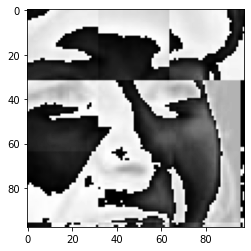

In [23]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [24]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedcroppedlionel_messi': ['C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi1.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi10.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi11.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi12.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi13.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi14.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi15.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedlionel_messi16.png',
  'C:/Users/ANIKET/OneDrive/Desktop/celebrity/dataset/croppedcroppedlionel_messi\\croppedli

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedcroppedlionel_messi': 0,
 'croppedcroppedmaria_sharapova': 1,
 'croppedcroppedroger_federer': 2,
 'croppedcroppedserena_williams': 3,
 'croppedcroppedvirat_kohli': 4}

In [26]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1',5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [27]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(133, 4096)

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7941176470588235

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.56      1.00      0.71         5
           2       0.67      0.50      0.57         4
           3       0.86      0.75      0.80         8
           4       0.88      0.88      0.88         8

    accuracy                           0.79        34
   macro avg       0.79      0.78      0.77        34
weighted avg       0.83      0.79      0.80        34



In [31]:
# Using GridSearchCV for selecting best model and params
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [33]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.768421,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.574737,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.767895,{'logisticregression__C': 1}


In [34]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8529411764705882

In [35]:
best_estimators['svm'].score(X_test, y_test)

0.7647058823529411

In [36]:
best_estimators['random_forest'].score(X_test, y_test)

0.6470588235294118

In [37]:
best_clf = best_estimators['logistic_regression']

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[8, 0, 0, 1, 0],
       [1, 4, 0, 0, 0],
       [0, 0, 3, 1, 0],
       [0, 0, 0, 8, 0],
       [0, 1, 0, 1, 6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

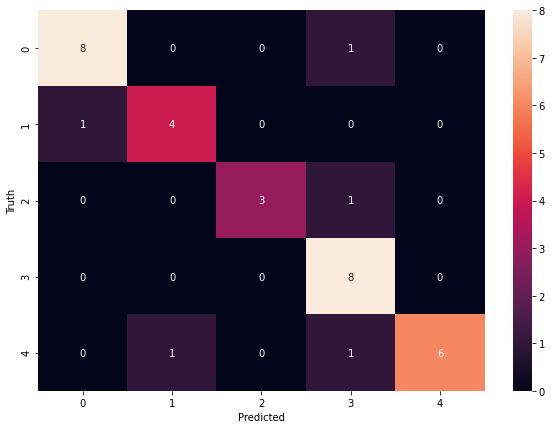

In [39]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
!pip install joblib
import joblib
# Saving as a pickle file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [41]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))